# Computer Vision 2022 Assignment 1: Image filtering

In this prac you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the prac are:

- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

## General instructions

Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries

- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

# The Questions

To get started, below is some setup code to import the libraries we need. You should not need to edit it.

In [1]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np

from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## Question 0: Numpy warm up! (5%)

Before starting the assignment, make sure you have a working Python 3 installation, with up to date versions of the libraries mentioned above. If this is all new to you, I'd suggest  downloading an all in one Python installation such as [Anaconda](https://www.anaconda.com/products/individual). Alternatively you can use a Python package manager such as pip or conda, to get the libraries you need. If you're struggling with this please ask a question on the MyUni discussion forum.

For this assignment, you need some familiarity with numpy syntax. The numpy QuickStart should be enough to get you started:

https://numpy.org/doc/stable/user/quickstart.html

Here are a few warm up exercises to make sure you understand the basics. Answer them in the space below. Be sure to print the output of each question so we can see it!

1. Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12.
2. Reshape Z into a 2D numpy array A with 3 rows and 4 columns.
3. Reshape Z into a 2D numpy array B with 4 rows and 3 columns.
4. Calculate the *matrix* product of A and B.
5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).


In [2]:
Z = np.arange(1,13,1)
print("Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12: \n",Z)
A = Z.reshape(3,4)
print("Reshape Z into a 2D numpy array A with 3 rows and 4 columns \n",A)
B = Z.reshape(4,3)
print("Reshape Z into a 2D numpy array B with 4 rows and 3 columns \n",B)
print("matrix product of A and B \n",np.matmul(A,B))
print("element wise product of A and B^T: \n",np.multiply(A,B.transpose()))

Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12: 
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
Reshape Z into a 2D numpy array A with 3 rows and 4 columns 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Reshape Z into a 2D numpy array B with 4 rows and 3 columns 
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
matrix product of A and B 
 [[ 70  80  90]
 [158 184 210]
 [246 288 330]]
element wise product of A and B^T: 
 [[  1   8  21  40]
 [ 10  30  56  88]
 [ 27  60  99 144]]


You need to be comfortable with numpy arrays because that is how we store images. Let's do that next!

## Question 1: Loading and displaying an image (10%)

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and channel. 

In [3]:
def display(img, caption=''):
    # Show image using pyplot
    plt.figure()
    if img.ndim == 3:
        img = np.clip(img,0,1)
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

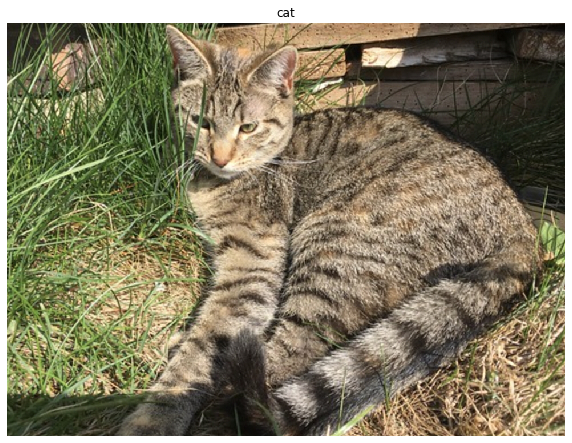

height: 724
width: 978
channel: 3



In [4]:
image1 = load('images/cat.jpg')

display(image1, 'cat')

print_stats(image1)

Return to this question after reading through the rest of the assignment. Find 2 more images to use as test cases in this assignment for all the following questions and display them below. Use your print_stats() function to display their height, width and number of channels. Explain *why* you have chosen each image.

In [5]:
### Your code to load and display your images here
image2 = load('images/a2_milk.jpeg')
# display(image2, 'taichi')
# print_stats(image2)

image3 = load('images/smol_calli.jpeg')
# display(image3, 'anime')
# print_stats(image3)

<table>
    <tr>
        <p>The picture I pick is a box of milk and a cartoon girl, the box of milk have a very clear edge and color in the image have large difference between, while the cartoon girl have different color but in general it's still an iconic image</p>
    </tr>
    <tr>
        <td><p>milk</p><img src="images/a2_milk.jpeg"></td>
        <td><p>mori</p><img src="images/smol_calli.jpeg"></td>
    </tr>
</table>

***Your explanation of images here***
 image1:  basically the first image is a large, not related to cat at all 
 image2:  this is a cat image which is similar to the image we are given

## Question 2: Image processing (20%)

Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `change_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.
5. Implement the `binary()` function in a1code.py.

What do you observe when you change the threshold of the binary function?

Apply all these functions with different parameters on your own test images.

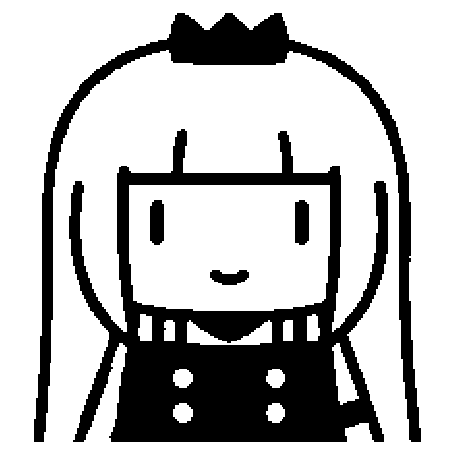

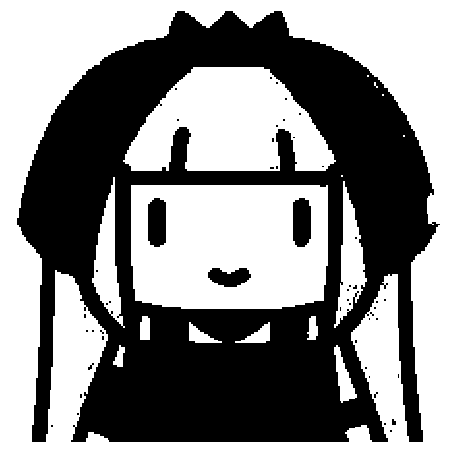

In [6]:
mori_g = greyscale(image3)
mori_b3 = binary(mori_g,0.3)
mori_b7 = binary(mori_g,0.8)
# print(mori_b3)

display(mori_b3)
display(mori_b7)

<table>
    <tr>
        <th>
            <p>In this binary with threshold 0.3 seil on the head is not detected</p>
            <img src="ans_quick_view/mori_b3.png">
        </th>
        <th>
            <p>In this binary with threshold 0.8 seil on the head is detected</p>
            <img src="ans_quick_view/mori_b8.png">
        </th>
    </tr>
    <tr>
        <p>we can know that after greyscale the number inside the pixel of ceil and button on cloths is more than 0,3 and less than 0.8, it find the edge of the ceil </p> 
    </tr>
</table>

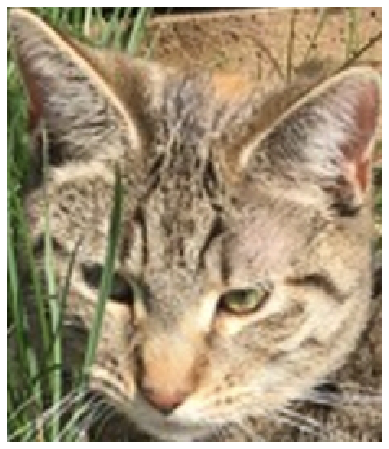

height: 267
width: 230
channel: 3



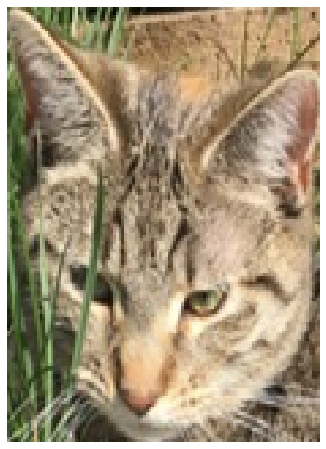

height: 160
width: 115
channel: 3



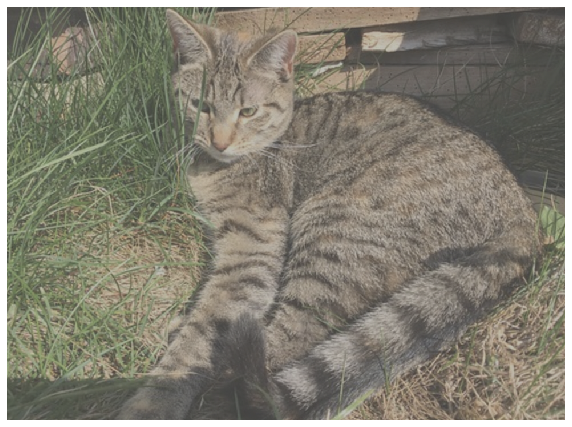

height: 724
width: 978
channel: 3



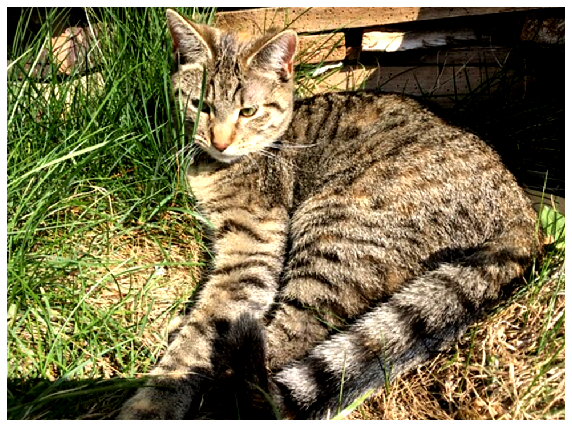

height: 724
width: 978
channel: 3



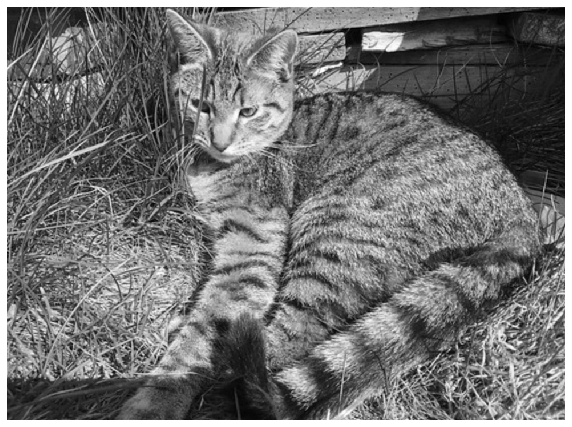

height: 724
width: 978
channel: 1



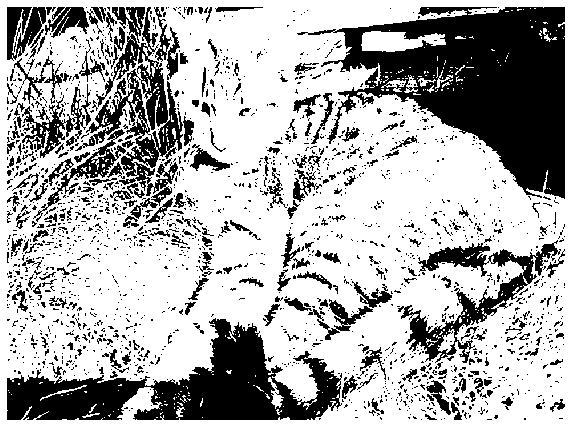

height: 724
width: 978
channel: 1



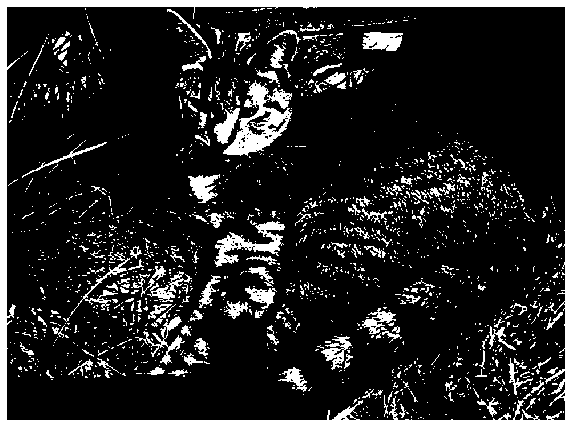

height: 724
width: 978
channel: 1



In [7]:
# This should crop the head from the cat image

crop_img = crop(image1, 278, 5, 508, 272)
display(crop_img) 
print_stats(crop_img)

resize_img = resize(crop_img, 0.5, 0.6 )
display(resize_img)
print_stats(resize_img)

contrast_img = change_contrast(image1, 0.5)
display(contrast_img)
print_stats(contrast_img)

contrast_img = change_contrast(image1, 1.5)
display(contrast_img)
print_stats(contrast_img)

grey_img = greyscale(image1)
display(grey_img)
print_stats(grey_img)

binary_img = binary(grey_img, 0.3)
display(binary_img)
print_stats(binary_img)

binary_img = binary(grey_img, 0.7)
display(binary_img)
print_stats(binary_img)

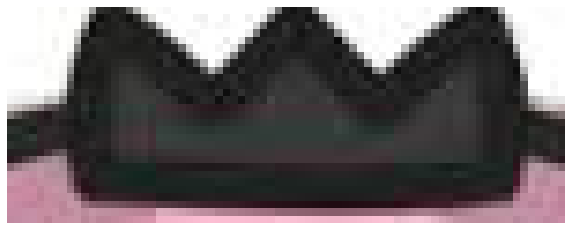

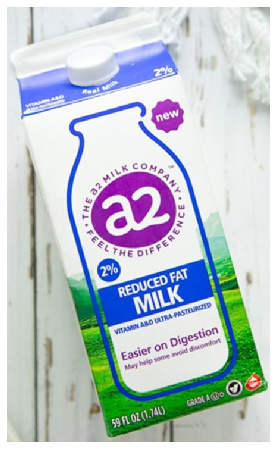

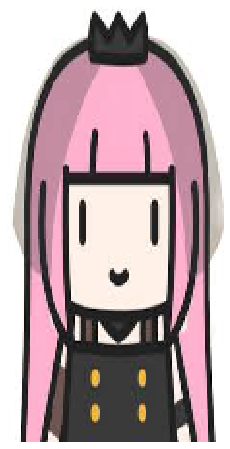

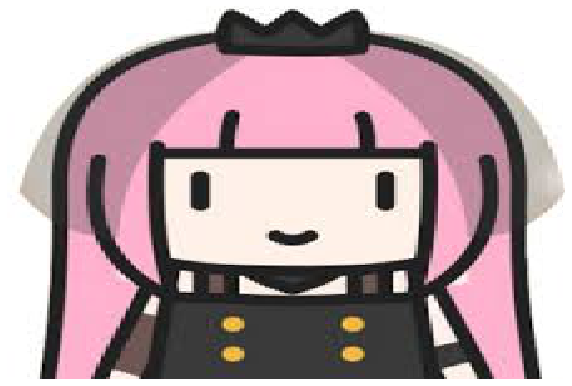

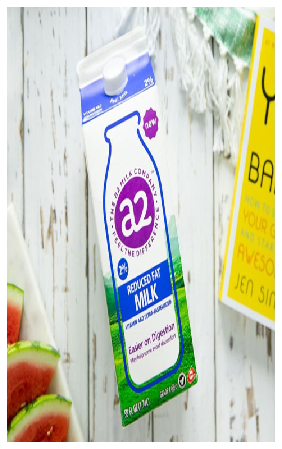

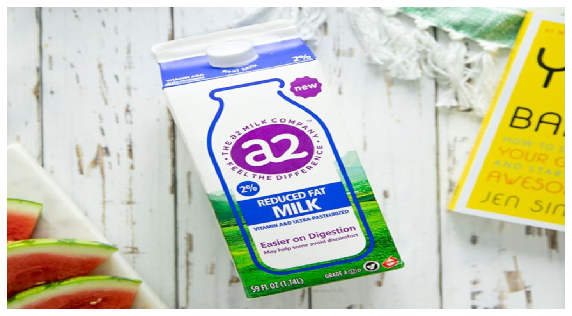

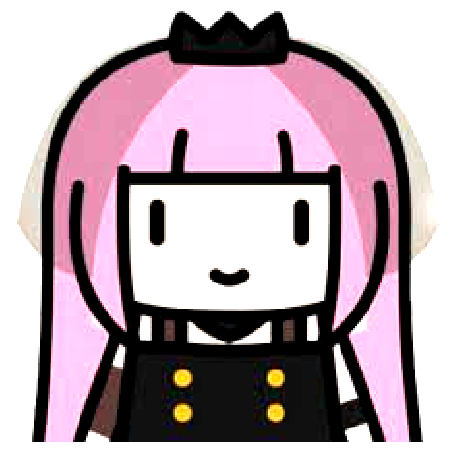

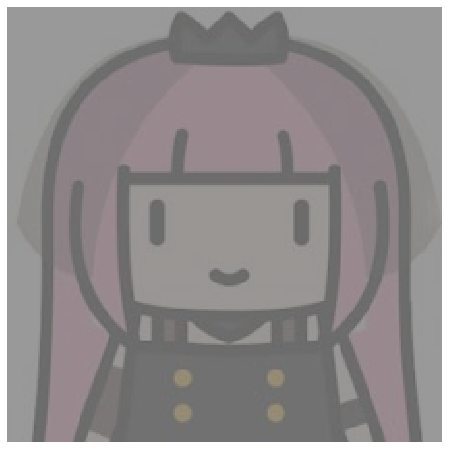

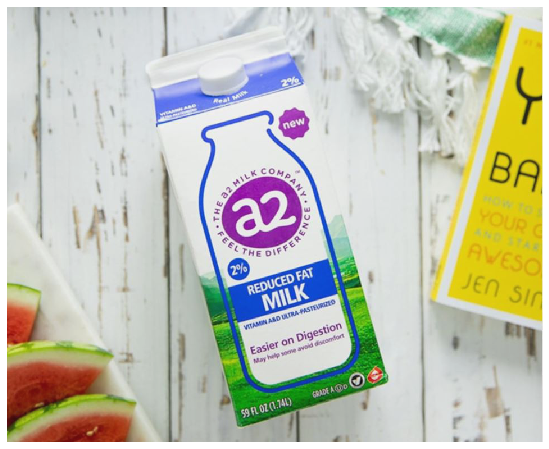

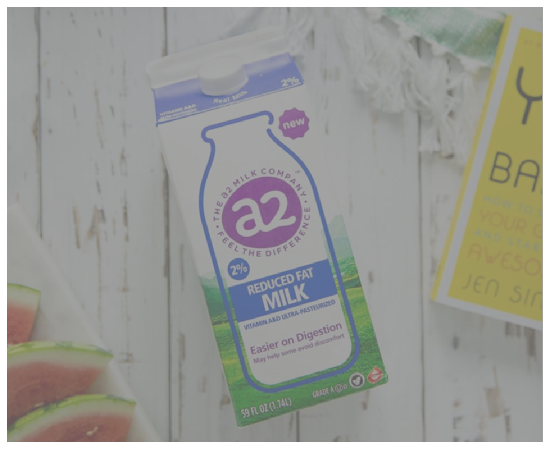

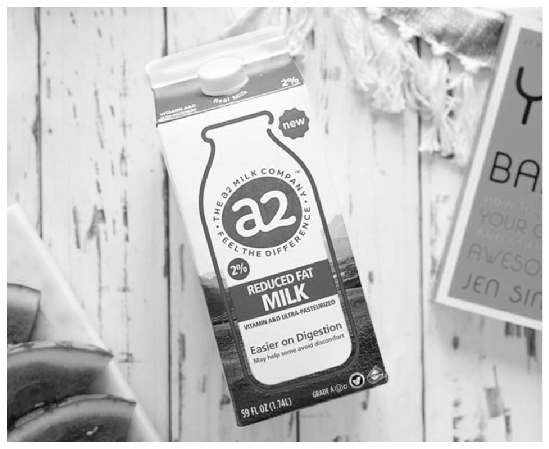

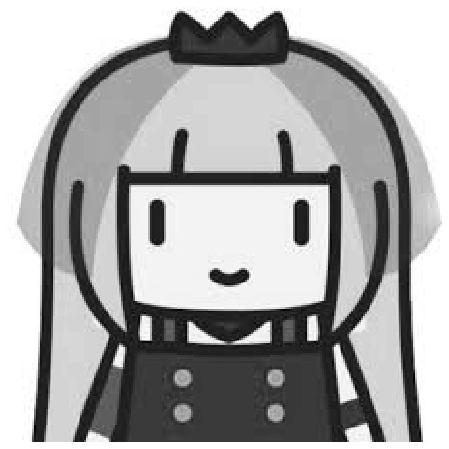

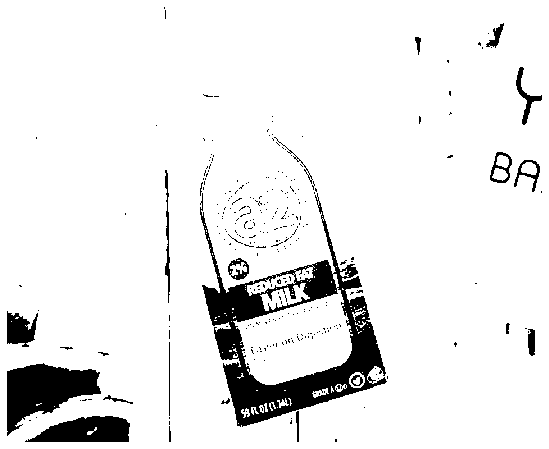

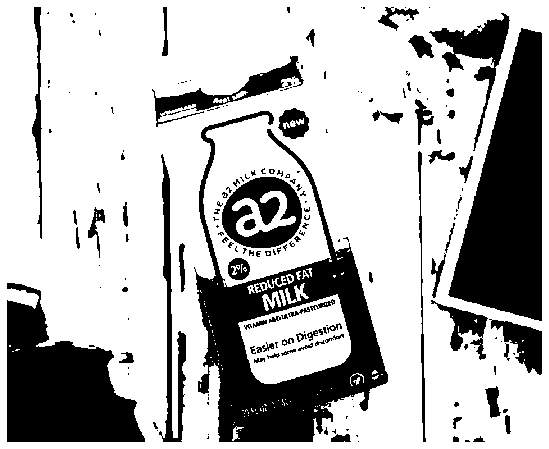

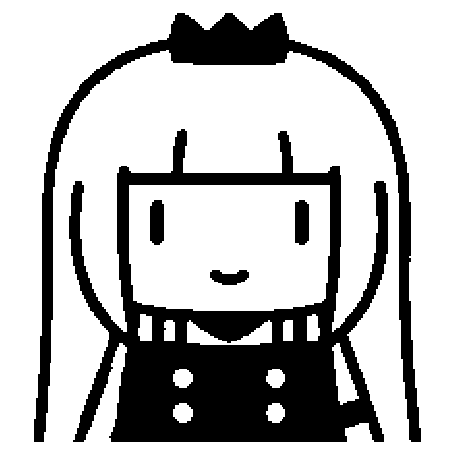

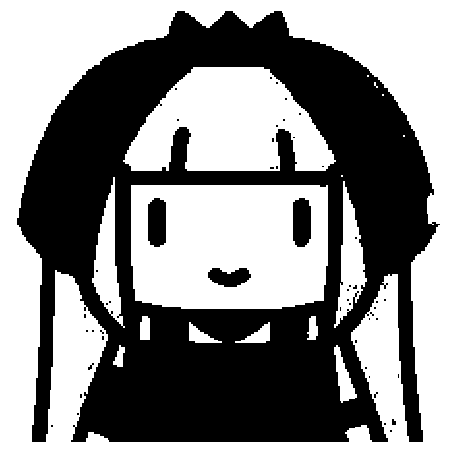

In [8]:
# Add your own tests here...
# crop image
crown = crop(image3,76,3,151,32)
display(crown)
box = crop(image2,241,25,683,756)
display(box)

# resize
fit_girl = resize(image3,0.5,1)
display(fit_girl)
fat_girl = resize(image3,1.5,1)
display(fat_girl)

fit_milk = resize(image2,0.5,1)
display(fit_milk)
fat_milk = resize(image2,1.5,1)
display(fat_milk)

# change contrast
mori_contrast = change_contrast(image3,1.6)
display(mori_contrast)
mori_contrast = change_contrast(image3,0.2)
display(mori_contrast)

milk_contrast = change_contrast(image2,0.9)
display(milk_contrast)
milk_contrast = change_contrast(image2,0.3)
display(milk_contrast)


# greyscale
milk_g = greyscale(image2)
display(milk_g)
display(mori_g)

# binary 
milk_b = binary(milk_g,0.4)
display(milk_b)
milk_b = binary(milk_g,0.7)
display(milk_b)

display(mori_b3)
display(mori_b7)


<h3>crop image</h3>
<table>
    <tr>
        <th>
            <p>crop the crown from girl</p>
            <img src="ans_quick_view/crown.png">
        </th>
        <th>
            <p>crop milk from image</p>
            <img src="ans_quick_view/milk_box.png">
        </th>
    </tr>
</table>

<h3>resize image</h3>
<table>
    <tr>
        <th>
            <p>original</p>
            <img src="ans_quick_view/mori.png">
        </th>
        <th>
            <p>girl with width 0.5</p>
            <img src="ans_quick_view/mori_s.png">
        </th>
        <th>
            <p>girl with width 1.5</p>
            <img src="ans_quick_view/mori_f.png">
        </th>
    </tr>
</table>
<table>
    <tr>
        <th>
            <p>original</p>
            <img src="ans_quick_view/milk.png">
        </th>
        <th>
            <p>milk with width 0.5</p>
            <img src="ans_quick_view/milk_s.png">
        </th>
        <th>
            <p>milk with width 1.5</p>
            <img src="ans_quick_view/milk_f.png">
        </th>
    </tr>
</table>

<h3>change contrast</h3>
<table>
    <tr>
        <th>
            <p>original image</p>
            <img src = "ans_quick_view/mori.png">
        </th>
        <th>
            <p>change contrast 1.6</p>
            <img src="ans_quick_view/mori_1_6.png">
        </th>
        <th>
            <p>change contrast 0.2</p>
            <img src="ans_quick_view/mori_0_2.png">
        </th>
    </tr>
</table>
<table>
    <tr>
        <th>
            <p>original image</p>
            <img src = "ans_quick_view/milk.png">
        </th>
        <th>
            <p>change contrast 0.9</p>
            <img src="ans_quick_view/milk_0.9.png">
        </th>
        <th>
            <p>change contrast 0.3</p>
            <img src="ans_quick_view/milk_0.3.png">
        </th>
    </tr>
</table>

<h3>greyscale image</h3>
<table>
    <tr>
        <th>
            <p>original image</p>
            <img src = "ans_quick_view/mori.png">
        </th>
        <th>
            <p>grey</p>
            <img src="ans_quick_view/mori_g.png">
        </th>
        <th>
            <p>original image</p>
            <img src="ans_quick_view/milk.png">
        </th>
        <th>
            <p>grey image</p>
            <img src="ans_quick_view/milk_g.png">
        </th>
    </tr>
</table>


<p>binary</p>
<table>
    <tr>
        <th>
            <p>original image</p>
            <img src = "ans_quick_view/mori.png">
        </th>
        <th>
            <p>binary 0.3</p>
            <img src="ans_quick_view/mori_b3.png">
        </th>
        <th>
            <p>binary 0.8</p>
            <img src="ans_quick_view/mori_b8.png">
        </th>
    </tr>
</table>
<table>
    <tr>
        <th>
            <p>original image</p>
            <img src = "ans_quick_view/milk.png">
        </th>
        <th>
            <p>binary 0.5</p>
            <img src="ans_quick_view/milk_b5.png">
        </th>
        <th>
            <p>binary 0.7</p>
            <img src="ans_quick_view/milk_b7.png">
        </th>
    </tr>
</table>

## Question 3: Convolution (20%)

### 3.1 2D convolution

Using the definition of 2D convolution from week 1, implement the convolution operation in the function `conv2D()` in a1code.py.


output of conv2D example:


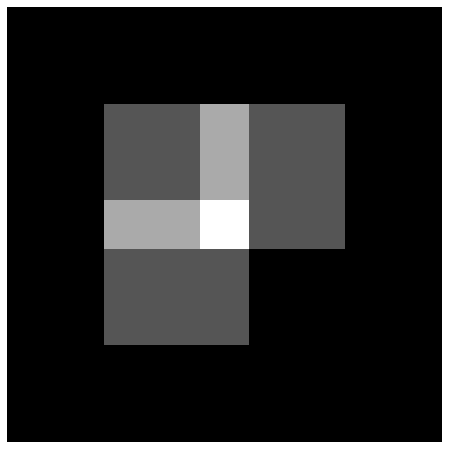

height: 9
width: 9
channel: 1



In [9]:

print("output of conv2D example:")
display(test_conv2D())
print_stats(test_conv2D())


<table>
    <tr>
        <th>
            <p>expected output</p>
            <img src="ans_quick_view/2D_conv.png">
        </th>
        <th>
            <p>my output</p>
            <img src="ans_quick_view/2D_conv.png">
        </th>
    </tr>
</table>

# 3.2 RGB convolution

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently. 

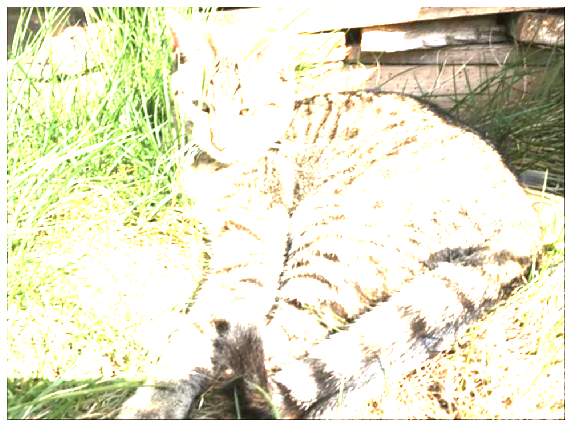

In [10]:
kernel = np.array(
    [
        [1,0,1],
        [0,0,0],
        [1,0,0]
    ])
image4 =load('images/cat.jpg')
result3_2 = conv(image4,kernel)
display(result3_2)
# print_stats(result3_2)

<table>
    <tr>
        <th>
            <p>original</p>
            <img src="ans_quick_view/cat.jpg">
        </th>
        <th>
            <p>after covolution with 3*3 given kernel</p>
            <img src="ans_quick_view/3.2.png">
        </th>
    </tr>
</table>

### 3.3 Gaussian filter convolution

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:

- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

change size of image with same filter


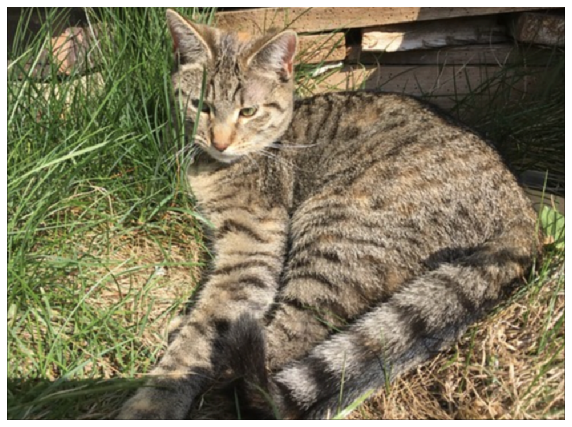

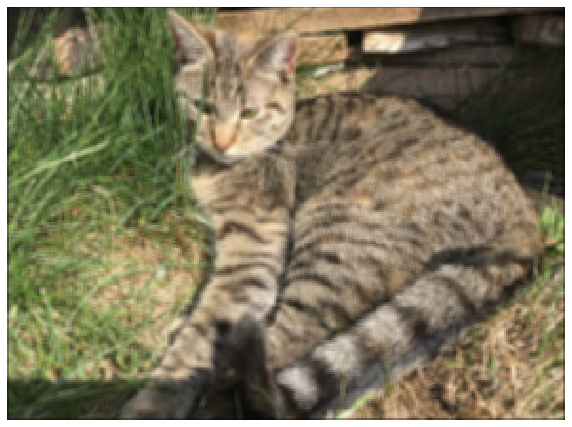

change size of filter with same image 


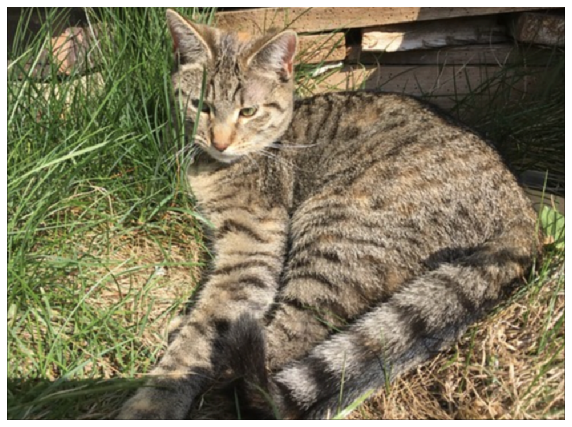

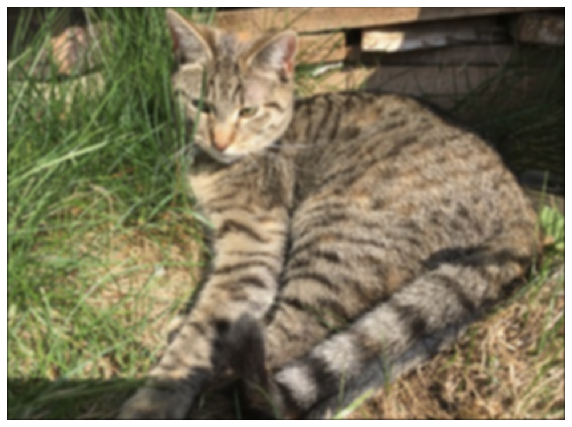


change variance of filter with same image 


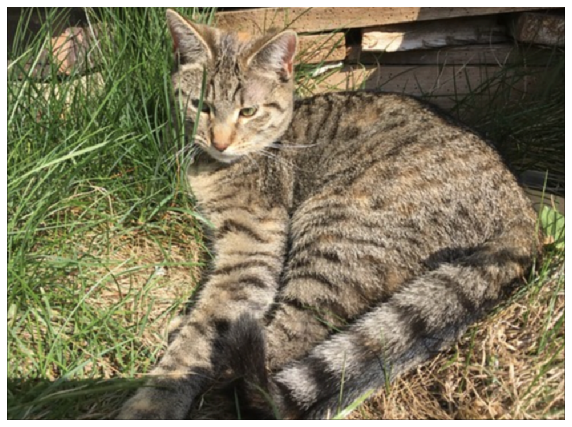

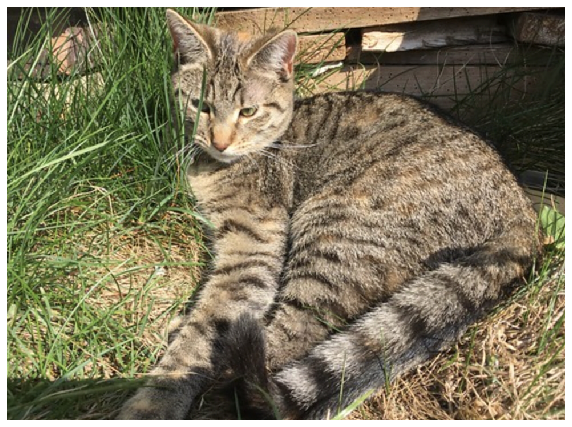

In [11]:
org_img = image1
smol_img = resize(image1,0.3,0.3)

print("change size of image with same filter")
o_gau3_3_1 = conv(org_img,gauss2D(3,3))
o_gau3_3_2 = conv(smol_img,gauss2D(3,3))
display(o_gau3_3_1)
# print_stats(o_gau3_3_1)
display(o_gau3_3_2)
# print_stats(o_gau3_3_2)
# print("Observation:change size of image casue the lost information, images show that both image getting blur by the gaussian filter")
# print()


print("change size of filter with same image ")
display(o_gau3_3_1)
o_gau3_3_2 = conv(org_img,gauss2D(11,3))
display(o_gau3_3_2)
# print_stats(o_gau3_3_2)
print("")

print("change variance of filter with same image ")
display(o_gau3_3_1)
o_gau3_3_2 = conv(org_img,gauss2D(3,0.3))
display(o_gau3_3_2)



<h1>try varying the image size, and the size and variance of the filter</h1>
<table>
    <tr>
        <p>change size of image with same filter</p>
        <th>
            <p>original</p>
            <img src="ans_quick_view/cat.jpg">
        </th>
        <th>
            <p>0.3 of image</p>
            <img src="ans_quick_view/3_1_im0.3.png">
        </th>
    </tr>
</table>

<table>
    <tr>
        <p>change size of filter with same image</p>
        <th>
            <p>filter size 3,sigma 3</p>
            <img src="ans_quick_view/gaus_2_1.png">
        </th>
        <th>
            <p>filter size 11,sigma 3</p>
            <img src="ans_quick_view/gaus_2_2.png">
        </th>
    </tr>
</table>

<table>
    <tr>
        <p>change variance of filter with same image</p>
        <th>
            <p>filter size 3,sigma 3</p>
            <img src="ans_quick_view/gaus_3_1.png">
        </th>
        <th>
            <p>filter size 3,sigma 10</p>
            <img src="ans_quick_view/gaus_3_2.png">
        </th>
    </tr>
</table>

<h1>subtract the filtered image from the original</h1>

In [ ]:
o_gau3_3_2 = conv(image1,gauss2D(15,10))
display(o_gau3_3_2)
display(image1-o_gau3_3_2)

<table>
    <tr>
        <th>
            <p>after gauss filter</p>
            <img src="ans_quick_view/3.3fil.png">
        </th>
        <th>
            <p>subtract</p>
            <img src="ans_quick_view/3.3minus.png">
        </th>
    </tr>
</table>

after changing the image size from 1 to 0.3, we observe that image have smaller size and lost information

after changing the filter size from 3 to 11, we observe that the image is further losing information,while having same size as original image

after changing the sigma, it's hard to tell 

By subtracting the image with the one after gaussian filter, we found that the information lost (most are edges) show out


### 3.4 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:

- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters

In [ ]:
sobel_v = np.array(
    [
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ])
sobel_h = np.array(
    [
        [1,0,-1],
        [2,0,-2],
        [1,0,-1]
    ])

print("orginal image with sobel_vertical")
display(conv(image1,sobel_v))
print("orginal image with sobel_horizontal")
display(conv(image1,sobel_h))

In [ ]:
smol_image = resize(image1,0.3,0.3)
display(smol_image)
print("0.3 image with sobel_vertical")
display(conv(smol_image,sobel_v))
print("0.3 image with sobel_horizontal")
display(conv(smol_image,sobel_h))

<table>
    <tr>
        <th>
            <p>original</p>
            <img src="ans_quick_view/cat.jpg">
        </th>
        <th>
            <p>vertical sobel</p>
            <img src="ans_quick_view/sobel_vert.png">
        </th>
        <th>
            <p>horizontal sobel</p>
            <img src="ans_quick_view/sobel_hori.png">
        </th>
    </tr>
</table>

<table>
    <tr>
        <th>
            <p>resize to 0.3</p>
            <img src="ans_quick_view/3_4_1.png">
        </th>
        <th>
            <p>0.3image with vertical sobel</p>
            <img src="ans_quick_view/3_4.png">
        </th>
        <th>
            <p>0.3 image with horizontal sobel</p>
            <img src="ans_quick_view/3_4_2.png">
        </th>
    </tr>
</table>

***Your comments/analysis of your results here
by applying the vertical and horizontal to the sobel filter result to different scale of same image, it observe that the original image having noise in output while the output of 0.3 resize image shows clear edge and respectively less noise.

## Question 4: Image sampling and pyramids (25%)

### 4.1 Image Sampling

Apply your `resize()` function to reduce an image (I) to 0.125 height and width, and then to enlarge the image back to its original size to get an image (I'). Display and compare I and I'.

Apply a Sobel filter to I to get the edge image E.

Apply a Sobel filter to I' to get the edge image E'.

Display and compare E and E'. What do you observe and why?

### 4.2 Image Pyramids 
Creat a Gaussian pyramid as described in week2's lecture on an image.

Apply a Gaussian kernel to an image I, and resize it with ratio 0.5, to get $I_1$. Repeat this step to get $I_2$, $I_3$ and $I_4$.

Display these four images following the zebra example shown in the lecture note.

What is your observation?



In [ ]:
# Your answers to question 4 here
#4.1
print("question 4.1:")
re = resize( image1, 0.125,0.125)
l_dot = resize( re, 8,8)
print("image I:")
display(image1)
print("image I':")
display(l_dot)
print("image E:")
display(conv(image1,sobel_v))

print("image E':")
display(conv(l_dot,sobel_v))
display(conv(l_dot,sobel_h))

<table>
    <tr>
        <th>
            <p>I</p>
            <img src="ans_quick_view/4_1_I.png">
        </th>
        <th>
            <p>I'</p>
            <img src="ans_quick_view/4_1_ID.png">
        </th>
    </tr>
    <tr>
        <th>
            <p>E</p>
            <img src="ans_quick_view/4_1_E.png">
        </th>
        <th>
            <p>E'</p>
            <img src="ans_quick_view/4_1_ED.png">
        </th>
    </tr>
</table>

4.1 observation:
  From the graph E and E' we can see that E' having bunch of noise in the image after the sobel filter. Observation is, if image losing certain amount of information, resize before sobel will no more remove noise but observe adding noise.

In [ ]:
#4.2
# gaussian_pyramid() in the bottom of a1code.py
print("question 4.2:")
# print_stats(image1)
l1 = gaussian_pyramid(conv(image1,gauss2D(3, 1000)))
l2 = gaussian_pyramid(l1)
l3 = gaussian_pyramid(l2)
l4 = gaussian_pyramid(l3)



# display the graph
combine= np.zeros((l1.shape[0], l1.shape[1]+l2.shape[1],l1.shape[2]))

right_list = [l2 ,l3, l4]
combine[:row, :col, :] = l1
right_row = 0
for pic in right_list:
    inside_row, inside_col,d = pic.shape
    combine[right_row:right_row + inside_row,l1.shape[1]:l1.shape[1] + inside_col] = pic
    right_row = right_row + inside_row
display(combine)

<h3>gaussian pyramid </h3>
<img src="ans_quick_view/4_2.png">

***Your comments/analysis of your results here...***

4.1 observation: 
  compare image I and I',images tell that after resize process cause the aliasing. Which means image lost information and jagged, the outline of the cat become rough and vague.
  In E and E', images show that the E works well in highlighting edges while E' lost the ability to highlight edges.
  
4.2 observation:
  We observe that resize image in this way seems to save more information when it zoom the picture.

## Question 5: Auto correlation (20%)

Recall from week 2 that cross-correlation is a measure of similarity between a template and an image. It is defined similarly to convolution.

### 5.1 Correlation function

Implement the function `corr()` in a1code.py, based on your convolution function. Hint: numpy's `flip()` function may be useful here.

### 5.2 Auto-correlation

We will experiment with *auto-correlation*, where the template patch is taken from the image it is being compared to. Use the cropped eye from Question 2 as your template. Calculate the correlation of that template with every location in the image, and display the output as an image. Where is the maximum similarity? (Hint: numpy functions `argmax()` and `unravel()` will be useful here). For simplicity, you can use a greyscale version of the image and template.

Is it what you expect? Why or why not?

In [ ]:
# area_show() function at the bottom of a1code.py
cat_eye = crop(image1, 402, 170, 445, 197)
in_img = greyscale(load('images/cat.jpg'))
cat_eye =greyscale(cat_eye)

print("start correlation")
correlation = corr(in_img,cat_eye)
coordinate =np.unravel_index(np.argmax(correlation,axis=None),correlation.shape)
print(coordinate)
display(correlation)
display(area_show(in_img,coordinate,cat_eye))　




<h3>observation</h3>
from the display of correlation result, we found that the middle location said it's in (61, 661), which is a fail result since we crop the image from(402-445, 170-197 ), it suppose to be found in that area 
<img src= "ans_quick_view/5.2.png">
by finding the result from the image, we can see it detect the eye on the wall, which is not making sense
<img src = "ans_quick_view/5.2s.png">

### 5.3 Modified auto-correlation

Try modifying your correlation template or the base image in different ways, and analyse the effect on correlation results. For example:

- if you did not find the correct location in 5.2, try centering the template about its mean (i.e. subtracting the mean brightness from each pixel)
- if you did find the correct location in 5.2, try using `resize()` and `change_contrast()` on the image. Where does it fail?

As before you will obtain marks for coming up with interesting tests and analysis, and displaying your results clearly. 

<h3>observation</h3>
after centering the template about the mean, we correctly find the eye,observation of the result image is at the eye of the cat, it's more lighter then the other point
<img src = "ans_quick_view/5.3.png">
also when we take the point back to the original image, this time it detect the correct position of eye
<img src = "ans_quick_view/5.3s.png">

In [ ]:
# Your code to answer question 5 and display results here
cat_eye = crop(image1, 402, 170, 445, 197)
in_img = greyscale(load('images/cat.jpg'))
cat_eye =greyscale(cat_eye)
cat_eye = cat_eye-np.average(cat_eye)

print("start auto-correlation")
auto_corr = corr(in_img,cat_eye)
coordinate = np.unravel_index(np.argmax(auto_corr,axis=None),auto_corr.shape)
print(coordinate)
display(auto_corr)
display(area_show(in_img,coordinate,cat_eye))